In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt 
import ipywidgets as widgets

In [2]:
I_1=cv.imread('images/frame_1.tif',0)
I_2=cv.imread('images/frame_2.tif',0)
I_1=np.float64(I_1)*(1.0/255)
I_2=np.float64(I_2)*(1.0/255)

In [3]:
def get_Ix(I_1,I_2):
    kernelx=np.ones((2,2), dtype = np.float64)
    kernelx[:,0]=-1.0
    g_x1=cv.filter2D(I_1,-1,kernelx)
    g_x2=cv.filter2D(I_2,-1,kernelx)
    Ix=g_x1+g_x2
    return Ix

In [4]:
def get_Iy(I_1,I_2):
    kernely=np.ones((2,2),dtype=np.float64)
    kernely[0,:]=-1.0
    g_y1=cv.filter2D(I_1,-1,kernely)
    g_y2=cv.filter2D(I_2,-1,kernely)
    Iy=g_y1+g_y2
    return Iy

In [5]:
def get_It(I_1,I_2):
    kernelt=np.ones((2,2),dtype=np.float64)*-1
    g_t1=cv.filter2D(I_1,-1,kernelt)
    g_t2=cv.filter2D(I_2,-1,(-kernelt))
    It = g_t1+g_t2
    return It

In [6]:
def get_LocalAvg(im):
    kernel=np.array([[1.0/12.0, 1.0/6.0, 1.0/12.0],
                     [1.0/6.0, 0, 1.0/6.0 ],
                     [1.0/12.0, 1.0/6.0, 1.0/12.0]], dtype=np.float64)

    return cv.filter2D(im,-1,kernel)
 

In [7]:
def runHornShunck(I_1,I_2):
    lmda = 0.05
    u =  np.zeros(I_1.shape, dtype=I_1.dtype)
    v =  np.zeros(I_1.shape, dtype=I_1.dtype)
    Ix=get_Ix(I_1,I_2)
    Iy=get_Iy(I_1,I_2)
    It=get_It(I_1,I_2)
    itr=0
    p_err=0.0
    while True:
        u_avg=get_LocalAvg(u)
        v_avg=get_LocalAvg(v)
        P= (Ix * u_avg) + (Iy * v_avg + It)
        D=(Ix*Ix) + (Iy*Iy)+ lmda
        der=P/D
        u = u_avg - (Ix*der)
        v = v_avg - (Iy*der)
        err = (Ix*u + Iy*v + It).mean()
        if(itr%10==0):
            print('itr %i : %f %f'% (itr,err,p_err))
        if(itr != 0 and np.abs(p_err) <= np.abs(err)):
            break
        itr+=1
        p_err=err
    return[u,v]

In [8]:
u,v=runHornShunck(I_1,I_2)

itr 0 : -0.000292 0.000000
itr 10 : -0.000024 -0.000026
itr 20 : -0.000011 -0.000012
itr 30 : -0.000006 -0.000006
itr 40 : -0.000003 -0.000003
itr 50 : -0.000000 -0.000001


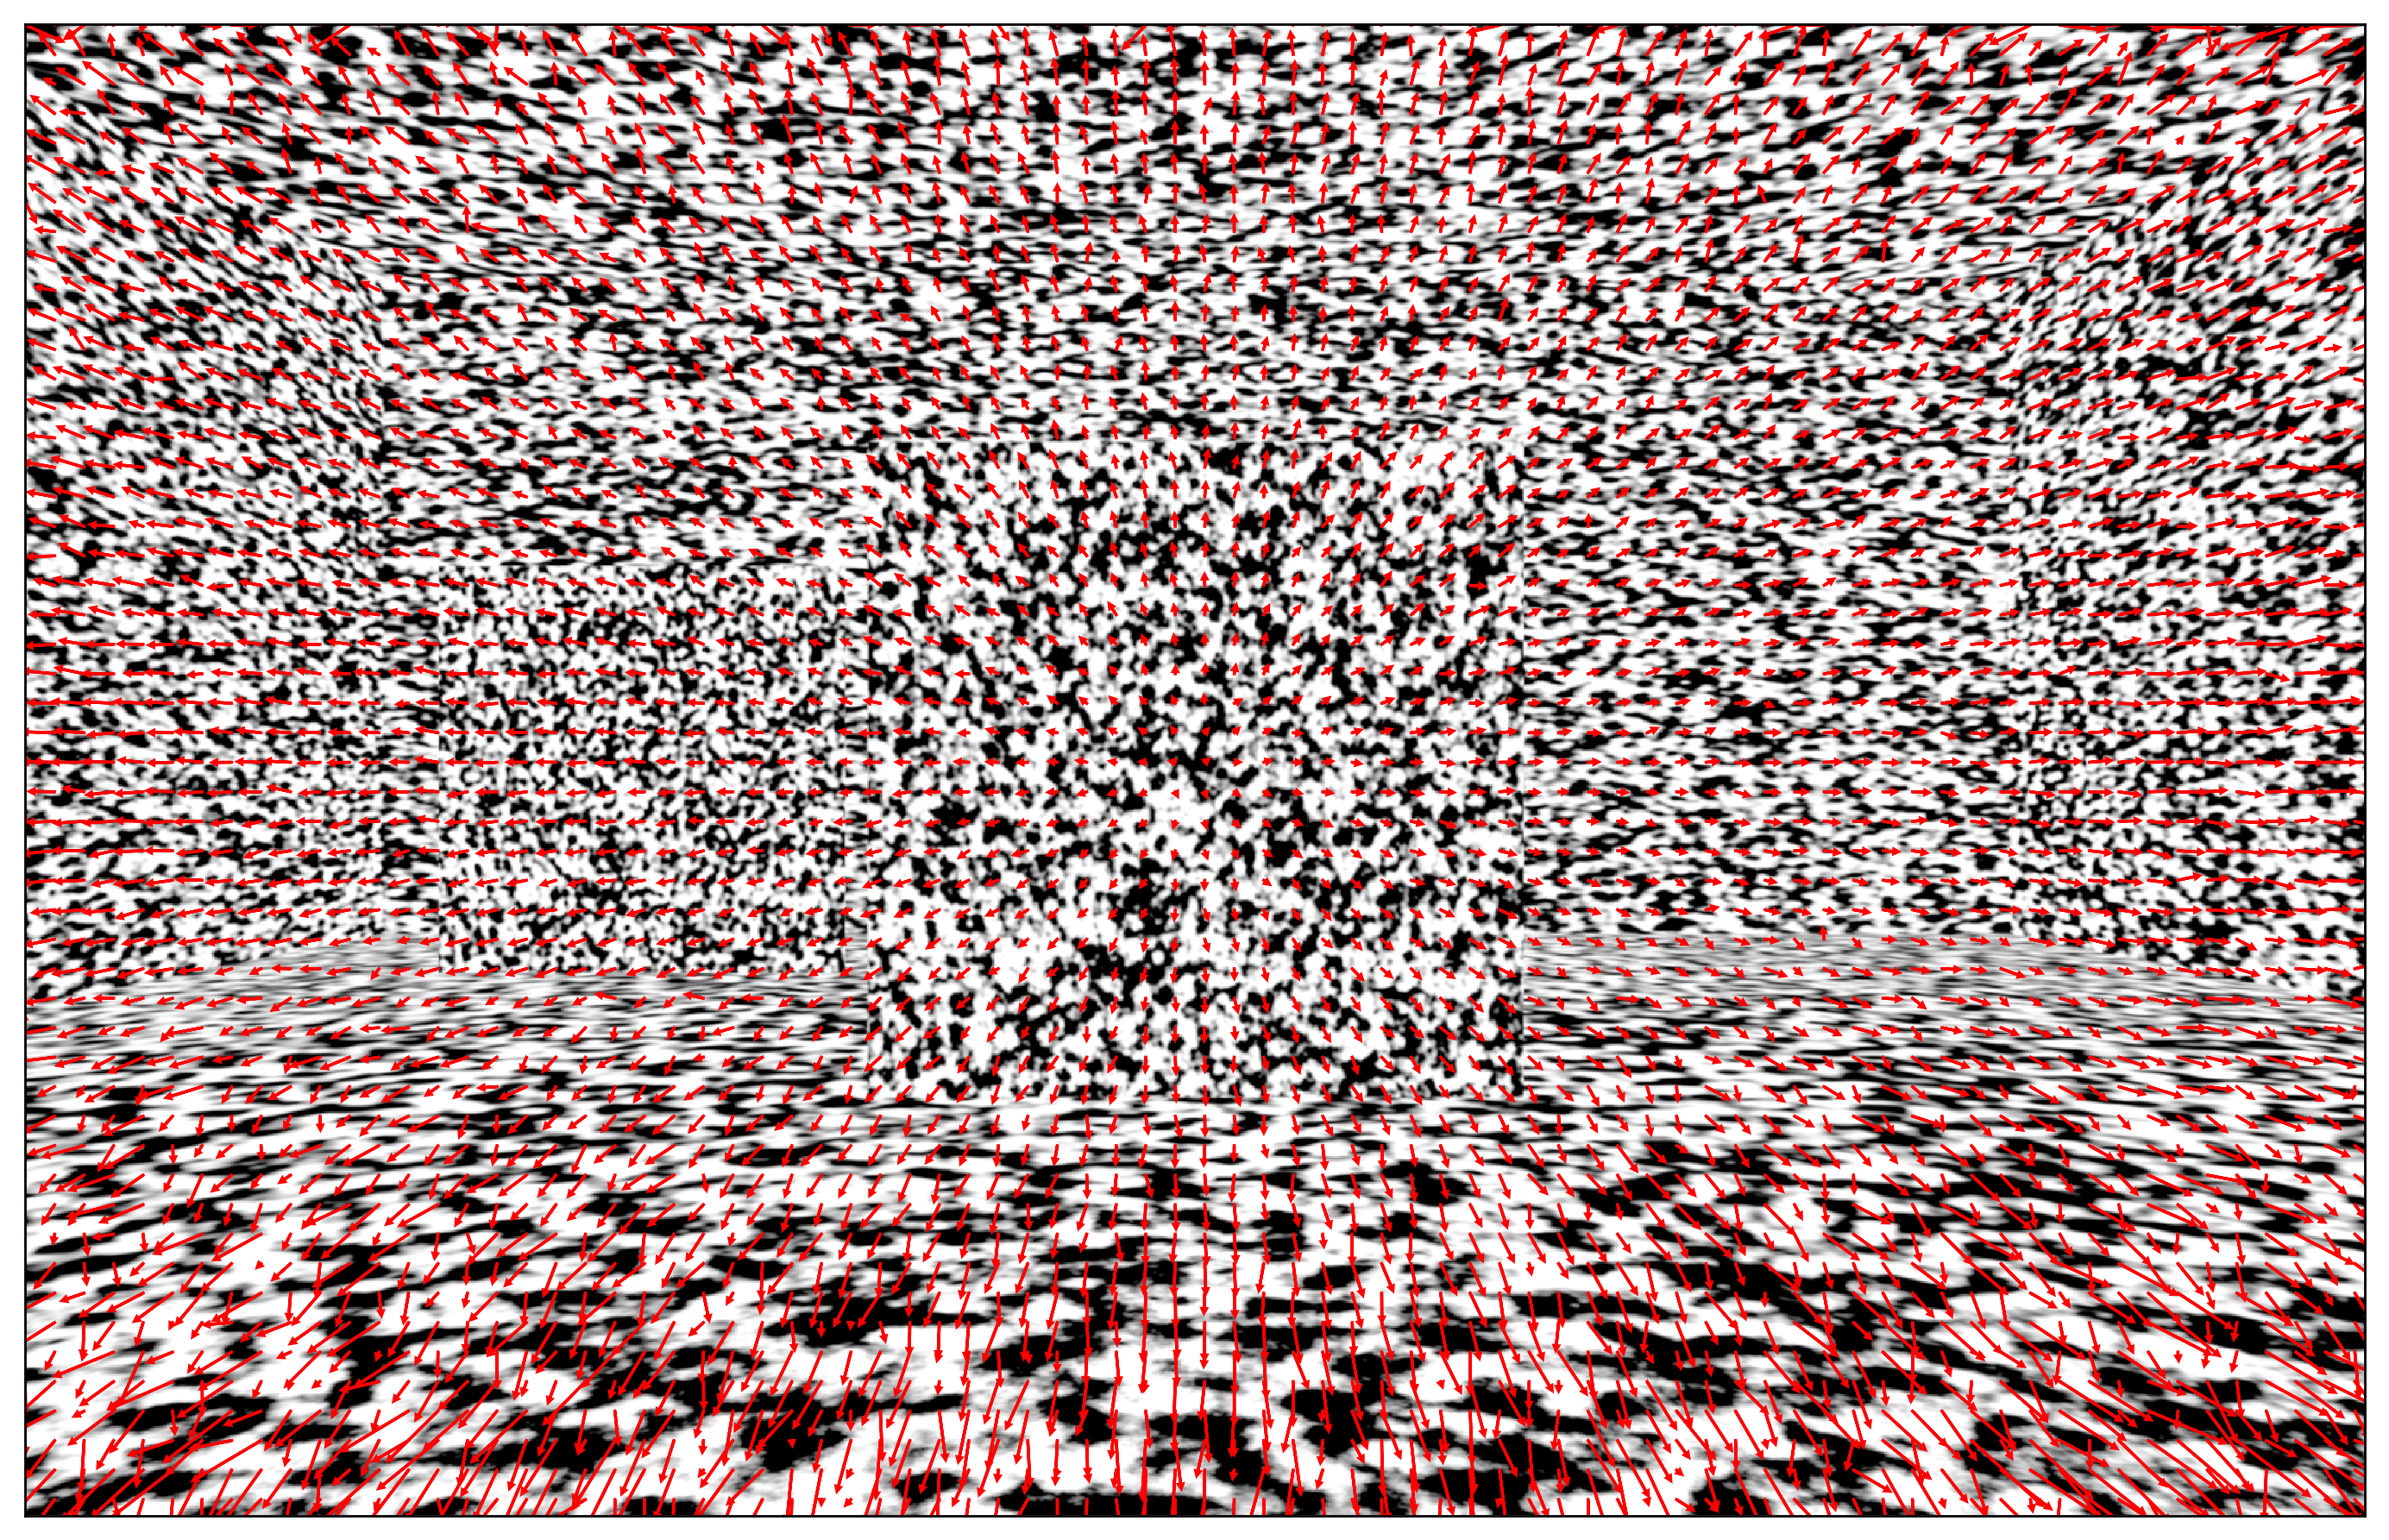

In [9]:
rows,cols=I_1.shape
f = plt.figure(figsize=(14,12),dpi=250)         
plt.imshow(I_2,cmap='gray')
plt.xticks([]), plt.yticks([])
for y in range(0, rows-1,25):
    for x in range(0, cols-1,25):
            fx=u[y,x]*25
            fy=v[y,x]*25
            plt.arrow(x,y,fx,fy,head_width=4, head_length=4,fc='r', ec='r')
plt.show()